In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from exod.utils.plotting import set_latex_font
set_latex_font()

In [6]:
list(custom_labels.values())

NameError: name 'custom_labels' is not defined

In [7]:
xrb = {'Name' : 'XRBs',
 't_lo' : 1,
 't_hi' : 2592000,
 'L_lo' : 1e33,
 'L_hi' : 2e39}

burst = {'Name' : 'X-ray Bursts',
         't_lo' : 1e-1,
         't_hi' : 1000,
         'L_lo' : 2e34,
         'L_hi' : 1e38}

qpe = {'Name' : 'QPEs',
         't_lo' : 60,
         't_hi' : 3600,
         'L_lo' : 1e36,
         'L_hi' : 2e39}

wd_tde  = {'Name' : 'WD TDEs',
         't_lo' : 60,
         't_hi' : 3600,
         'L_lo' : 1e36,
         'L_hi' : 1e39}

tde  = {'Name' : 'TDEs',
         't_lo' : 100,
         't_hi' : 10000,
         'L_lo' : 1e43,
         'L_hi' : 1e45}

agn  = {'Name' : 'AGN',
         't_lo' : 86400,
         't_hi' : 12*2592000,
         'L_lo' : 1e40,
         'L_hi' : 1e48}


sgr  = {'Name' : 'GRBs / SGRs',
         't_lo' : 100e-3,
         't_hi' : 100,
         'L_lo' : 1e37,
         'L_hi' : 1e47}

blazar  = {'Name' : 'Blazar Flares',
         't_lo' : 60,
         't_hi' : 3.156e+7,
         'L_lo' : 1e46,
         'L_hi' : 1e44}

ulxs  = {'Name' : 'ULXs',
         't_lo' : 1e2,
         't_hi' : 100*86400,
         'L_lo' : 1e39,
         'L_hi' : 1e41}

sn  = {'Name' : 'SN\nX-ray\nflashes',
         't_lo' : 90,
         't_hi' : 200,
         'L_lo' : 1e39,
         'L_hi' : 1e46}

sf  = {'Name' : 'Stellar\nFlares',
         't_lo' : 1000,
         't_hi' : 10000,
         'L_lo' : 1e29,
         'L_hi' : 1e32}

dn  = {'Name' : 'Dwarf Novae',
         't_lo' : 50,
         't_hi' : 1e5,
         'L_lo' : 1e30,
         'L_hi' : 1e32}

srcs = [xrb, burst, agn, qpe,  sgr, blazar,  dn ,ulxs,tde, sn, sf]
df = pd.DataFrame(srcs)


bright_colors = [
    '#1f78b4',  # Blue
    '#33a02c',  # Green
    '#e31a1c',  # Red
    '#ff7f00',  # Orange
    '#6a3d9a',  # Purple
    '#a6cee3',  # Light Blue
    '#b2df8a',  # Light Green
    '#fb9a99',  # Light Red
    '#fdbf6f',  # Light Orange
    '#cab2d6',  # Light Purple
    '#ffff99'   # Yellow
]


df['color'] = bright_colors

df

,Name,t_lo,t_hi,L_lo,L_hi,color
0,XRBs,1.0,2592000.0,1.000000e+33,2.000000e+39,#1f78b4
1,X-ray Bursts,0.1,1000.0,2.000000e+34,1.000000e+38,#33a02c
2,AGN,86400.0,31104000.0,1.000000e+40,1.000000e+48,#e31a1c
3,QPEs,60.0,3600.0,1.000000e+36,2.000000e+39,#ff7f00
4,GRBs / SGRs,0.1,100.0,1.000000e+37,1.000000e+47,#6a3d9a
5,Blazar Flares,60.0,31560000.0,1.000000e+46,1.000000e+44,#a6cee3
6,Dwarf Novae,50.0,100000.0,1.000000e+30,1.000000e+32,#b2df8a
7,ULXs,100.0,8640000.0,1.000000e+39,1.000000e+41,#fb9a99
8,TDEs,100.0,10000.0,1.000000e+43,1.000000e+45,#fdbf6f
9,SN\nX-ray\nflashes,90.0,200.0,1.000000e+39,1.000000e+46,#cab2d6


In [8]:
PN_max_exp = 131299
PN_mean_exp = 21005

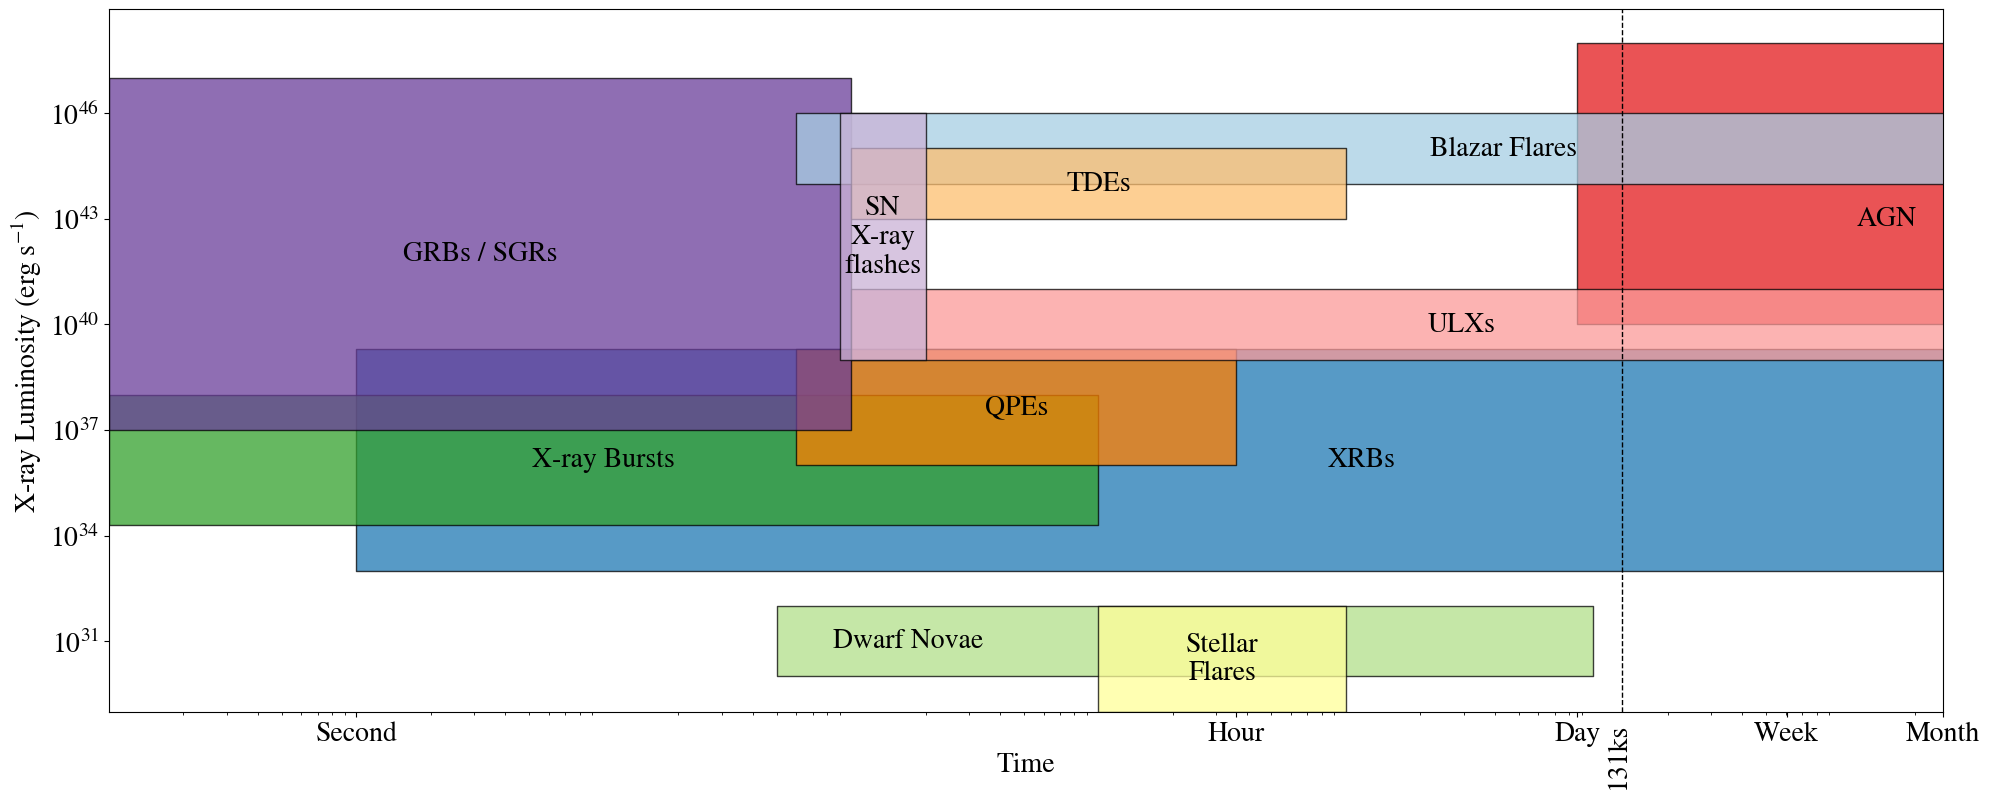

In [12]:
plt.figure(figsize=(20,8))

plt.axvline(PN_max_exp, ls='--', color='black', lw=1.0)

for i, r in df.iterrows():
    label      = r['Name']
    color      = r['color']
    xlo, xhi   = r['t_lo'], r['t_hi']
    ylo, yhi   = r['L_lo'], r['L_hi']
    xcen, ycen = np.sqrt(xhi*xlo), np.sqrt(yhi*ylo)

    plt.fill_between([xlo, xhi], ylo, yhi,  alpha=0.75, lw=1.0, ls='-', edgecolor='black', facecolor=color)
    if label == 'XRBs':
        plt.text(xcen+1e4, ycen, label, color='black', ha='center', va='center', fontsize=20)
    elif 'Dwarf' in label:
        plt.text(170, ycen, label, color='black', ha='center', va='center', fontsize=20)
    elif 'AGN' in label:
        plt.text(xcen-1e5, ycen/10, label, color='black', ha='center', va='center', fontsize=20)
    else:
        plt.text(xcen, ycen, label, color='black', ha='center', va='center', fontsize=20)


plt.yscale('log')
plt.xscale('log')
plt.xlabel('Time', fontsize=20)
plt.ylabel(r'X-ray Luminosity ($\mathrm{erg \ s ^{-1}} )$', fontsize=20)

custom_labels = {
    1e-3     : 'Milisecond',
    1        : 'Second',
    3600     : 'Hour',
    86400    : 'Day',
    604800   : 'Week',
    2592000  : 'Month'}

plt.xticks(ticks=list(custom_labels.keys()), labels=custom_labels.values(), fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.text(1.3*86400, 0.1e28, s='131ks', fontsize=20, rotation=90)
plt.xlim(1e-1, 2592000)
plt.ylim(ymin=1e29)
plt.tight_layout()
plt.savefig('../data/plots/transients.png', transparent=True)
plt.savefig('../data/plots/transients.pdf')
plt.show()

In [13]:
Transient X-ray Binaries
X-ray Bursts (Type I & II)
Quasi-Periodic Eruptions (QPEs)
Gamma Ray Bursts (GRBs)
Tidal Disruption Events from WDs (WD TDEs)
Soft-Gamma Repeaters (SGRs)
Blazar flares
Supernova X-ray flashes
Stellar Flares & Superflares
FRB Precursors
Unknown processes

SyntaxError: invalid syntax (3937765123.py, line 1)